In [6]:
# importar las librerías necesarias

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt
import time

In [7]:
# Cargar Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar a valores de 0 a 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Añadir canal (28,28,1)
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

print("Shape entrenamiento:", x_train.shape)
print("Shape prueba:", x_test.shape)

Shape entrenamiento: (60000, 28, 28, 1)
Shape prueba: (10000, 28, 28, 1)


In [8]:
# Modelo 1 - Corresponde a la CNN básica
def build_basic_cnn():
    model = models.Sequential([
        # Conv2D (32 filtros, 3×3, ReLU)
        # Extrae bordes y patrones simples:
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        # MaxPooling2D (2×2) Reduce tamaño y retiene características importantes:
        layers.MaxPooling2D((2,2)),
        # Conv2D (64 filtros, 3×3, ReLU)  Aprende patrones más complejos:
        layers.Conv2D(64, (3,3), activation='relu'),
        # Reduce dimensionalidad:
        layers.MaxPooling2D((2,2)),
        # Convierte el mapa de características en un vector:
        layers.Flatten(),
        # Capa densa para combinar características:
        layers.Dense(128, activation='relu'),
        # Clasificación final en 10 clases:
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [9]:
# Modelo 2 - CNN mejorada (Dropout + BatchNorm + optimizador distinto)
def build_improved_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(10, activation='softmax')
    ])
    # Compilación
    # Optimizador: Adam
    # Pérdida: sparse_categorical_crossentropy
    # Métrica: accuracy
    model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-3),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [10]:
# 3. Entrenamiento de ambos modelos
basic_model = build_basic_cnn()
improved_model = build_improved_cnn()

EPOCHS = 10
BATCH = 64

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Entrenamiento con medición de tiempo:

# Modelo básico
start = time.time()
history_basic = basic_model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH,
    validation_split=0.1,
    verbose=1
)
time_basic = time.time() - start

# Modelo mejorado
start = time.time()
history_improved = improved_model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH,
    validation_split=0.1,
    verbose=1
)
time_improved = time.time() - start

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 55ms/step - accuracy: 0.7430 - loss: 0.7216 - val_accuracy: 0.8463 - val_loss: 0.4171
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.8722 - loss: 0.3524 - val_accuracy: 0.8877 - val_loss: 0.3091
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 85s 57ms/step - accuracy: 0.8924 - loss: 0.2977 - val_accuracy: 0.8912 - val_loss: 0.2959
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 57ms/step - accuracy: 0.9070 - loss: 0.2576 - val_accuracy: 0.9015 - val_loss: 0.2739
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.9160 - loss: 0.2286 - val_accuracy: 0.9063 - val_loss: 0.2501
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - accuracy: 0.9244 - loss: 0.2080 - val_accuracy: 0.9113 - val_loss: 0.2477
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 55ms/step - accuracy: 0.9304 - loss: 0.1875 - val_accuracy: 0.9180 - val_loss: 0.2315
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9385 - loss: 0.1661 - 

In [12]:
# 4. Evaluación en el set de prueba
test_basic = basic_model.evaluate(x_test, y_test, verbose=0)
test_improved = improved_model.evaluate(x_test, y_test, verbose=0)

print("Modelo básico - Loss:", test_basic[0], "Accuracy:", test_basic[1])
print("Modelo mejorado - Loss:", test_improved[0], "Accuracy:", test_improved[1])

print("Tiempo entrenamiento básico:", time_basic, "segundos")
print("Tiempo entrenamiento mejorado:", time_improved, "segundos")

Modelo básico - Loss: 0.2794267237186432 Accuracy: 0.9092000126838684
Modelo mejorado - Loss: 0.2079528570175171 Accuracy: 0.9230999946594238
Tiempo entrenamiento básico: 610.3689386844635 segundos
Tiempo entrenamiento mejorado: 2215.019844532013 segundos


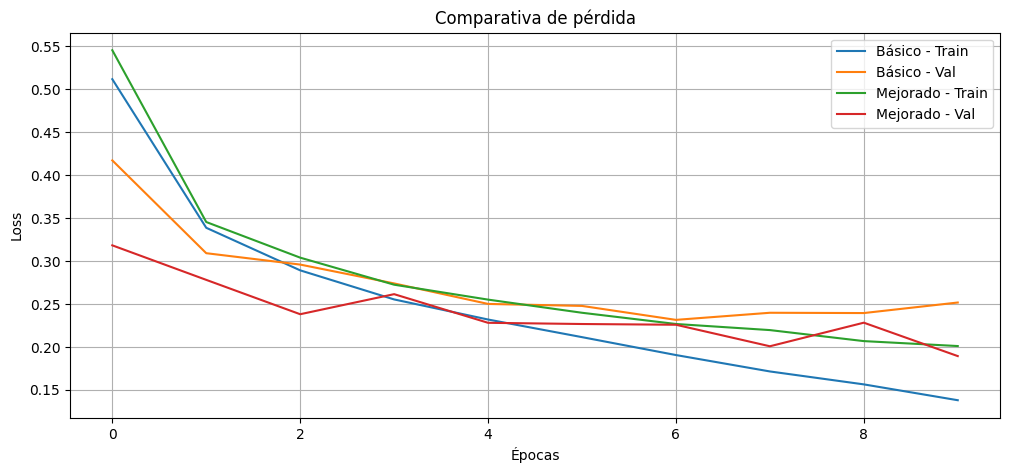

In [13]:
# Gráficas comparativas:

plt.figure(figsize=(12,5))
plt.plot(history_basic.history['loss'], label='Básico - Train')
plt.plot(history_basic.history['val_loss'], label='Básico - Val')
plt.plot(history_improved.history['loss'], label='Mejorado - Train')
plt.plot(history_improved.history['val_loss'], label='Mejorado - Val')
plt.title("Comparativa de pérdida")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

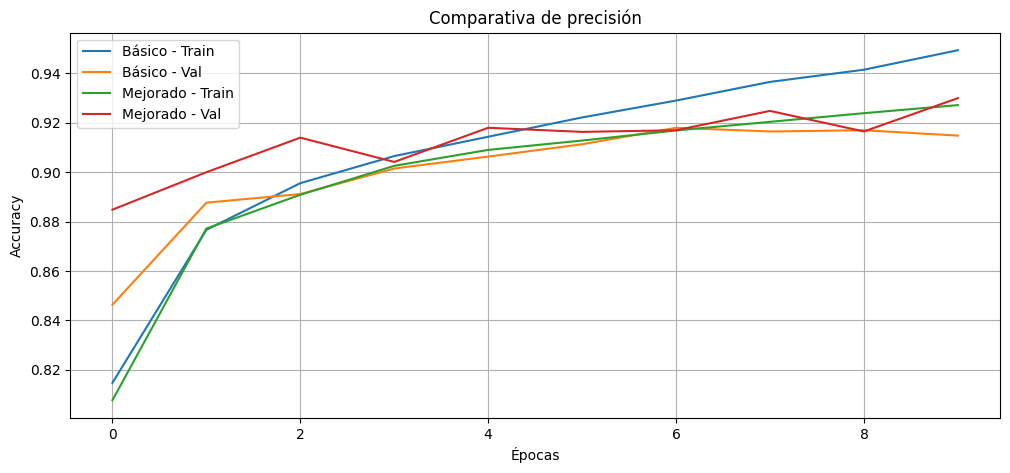

In [14]:
# Precisión

plt.figure(figsize=(12,5))
plt.plot(history_basic.history['accuracy'], label='Básico - Train')
plt.plot(history_basic.history['val_accuracy'], label='Básico - Val')
plt.plot(history_improved.history['accuracy'], label='Mejorado - Train')
plt.plot(history_improved.history['val_accuracy'], label='Mejorado - Val')
plt.title("Comparativa de precisión")
plt.xlabel("Épocas")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()